# Assignment #5

## Due: November 17, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

In [1]:
library('tidyverse')

volcano <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  

Use the `print` function to find the number of rows and columns in the data.

In [2]:
print(volcano)

# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [3]:
volcgroup <- group_by(volcano, volcano_name) %>% count(volcano_name) %>% arrange(desc(n))

print(volcgroup)

#Etna

# A tibble: 921 x 2
# Groups:   volcano_name [921]
   volcano_name               n
   <chr>                  <int>
 1 Etna                     241
 2 Fournaise, Piton de la   194
 3 Asosan                   186
 4 Villarrica               164
 5 Asamayama                147
 6 Katla                    132
 7 Klyuchevskoy             111
 8 Mauna Loa                110
 9 Merapi                   110
10 Izu-Oshima               108
# … with 911 more rows


Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [4]:
etna <- filter(volcano, volcano_name == 'Etna') %>% arrange(desc(start_year))

print(etna, width = Inf)

#2013

# A tibble: 241 x 15
   volcano_number volcano_name eruption_number eruption_category 
            <dbl> <chr>                  <dbl> <chr>             
 1         211060 Etna                   20841 Confirmed Eruption
 2         211060 Etna                   13854 Confirmed Eruption
 3         211060 Etna                   13853 Confirmed Eruption
 4         211060 Etna                   13852 Confirmed Eruption
 5         211060 Etna                   13849 Confirmed Eruption
 6         211060 Etna                   13848 Confirmed Eruption
 7         211060 Etna                   13847 Confirmed Eruption
 8         211060 Etna                   13846 Confirmed Eruption
 9         211060 Etna                   13838 Confirmed Eruption
10         211060 Etna                   13837 Confirmed Eruption
   area_of_activity                         vei start_year start_month start_day
   <chr>                                  <dbl>      <dbl>       <dbl>     <dbl>
 1 New Southeast Crater (

Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

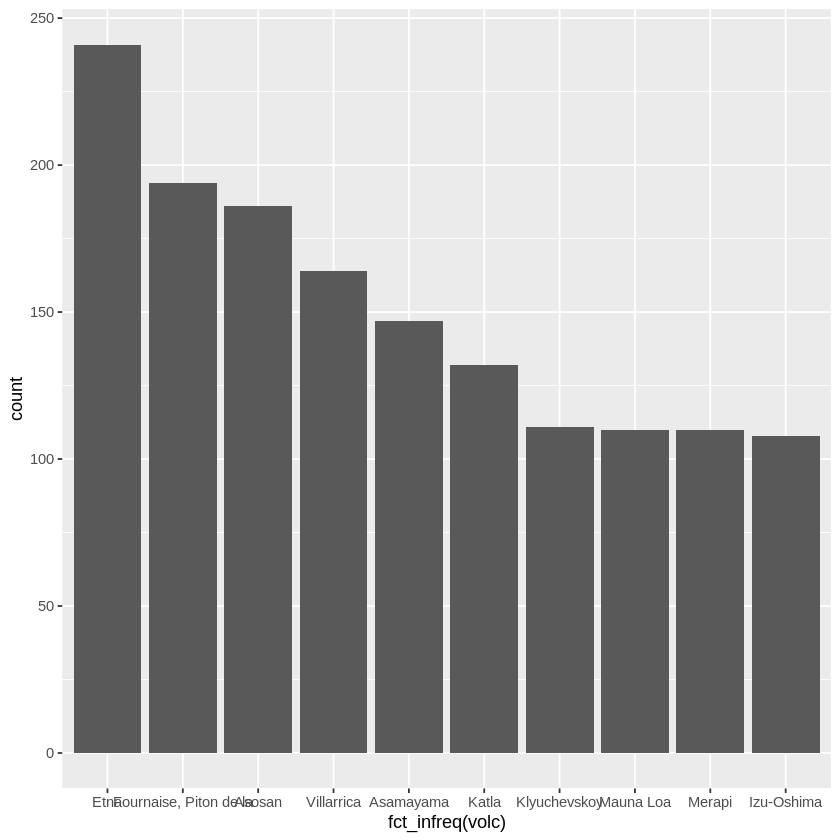

In [15]:
volcplot <- mutate(volcano, volc = fct_lump(volcano_name, n = 10)) %>% filter(volc != 'Other')
p <- ggplot(data=volcplot, aes(x=fct_infreq(volc))) +
    geom_bar()
p

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

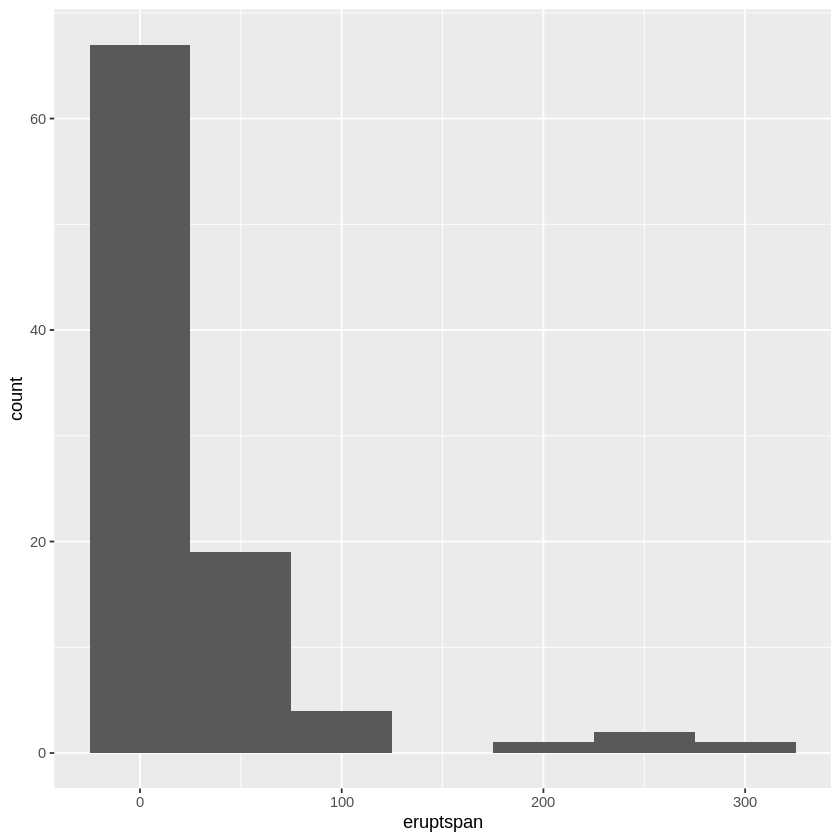

In [19]:
erupt <- mutate(volcano, eruptspan = end_year - start_year) %>% filter(eruptspan >= 10)

m <- ggplot(data=erupt, aes(x = eruptspan)) + geom_histogram(binwidth = 50)

m

In [21]:
eruptlong <- arrange(erupt, desc(eruptspan)) %>% select(volcano_name, eruptspan)

print(eruptlong)

#Stromboli 299 Years

# A tibble: 94 x 2
   volcano_name eruptspan
   <chr>            <dbl>
 1 Stromboli          299
 2 Fogo               261
 3 Yasur              246
 4 Sangay             188
 5 Santa Maria         98
 6 Dukono              87
 7 Stromboli           86
 8 Sangay              77
 9 Kilauea             71
10 Galeras             66
# … with 84 more rows
